In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Rainfall_Prediction.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [5]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [6]:
df.shape

(8425, 23)

In [7]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [8]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

<AxesSubplot:>

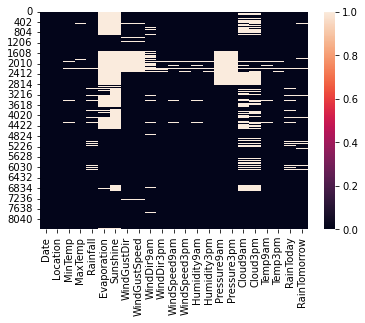

In [9]:
sns.heatmap(df.isnull())

In [10]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


1.There is a large difference in 75% percentile and max.
2.These observations suggest that there are extreme outliers.

In [11]:
df.skew()

MinTemp          -0.089588
MaxTemp           0.379297
Rainfall         13.028837
Evaporation      10.710605
Sunshine         -0.519717
WindGustSpeed     0.711103
WindSpeed9am      0.956250
WindSpeed3pm      0.491069
Humidity9am      -0.255843
Humidity3pm       0.117563
Pressure9am      -0.022133
Pressure3pm      -0.009385
Cloud9am         -0.309417
Cloud3pm         -0.232598
Temp9am          -0.014699
Temp3pm           0.395061
dtype: float64

MinTemp             AxesSubplot(0.125,0.536818;0.0824468x0.343182)
MaxTemp          AxesSubplot(0.223936,0.536818;0.0824468x0.343182)
Rainfall         AxesSubplot(0.322872,0.536818;0.0824468x0.343182)
Evaporation      AxesSubplot(0.421809,0.536818;0.0824468x0.343182)
Sunshine         AxesSubplot(0.520745,0.536818;0.0824468x0.343182)
WindGustSpeed    AxesSubplot(0.619681,0.536818;0.0824468x0.343182)
WindSpeed9am     AxesSubplot(0.718617,0.536818;0.0824468x0.343182)
WindSpeed3pm     AxesSubplot(0.817553,0.536818;0.0824468x0.343182)
Humidity9am            AxesSubplot(0.125,0.125;0.0824468x0.343182)
Humidity3pm         AxesSubplot(0.223936,0.125;0.0824468x0.343182)
Pressure9am         AxesSubplot(0.322872,0.125;0.0824468x0.343182)
Pressure3pm         AxesSubplot(0.421809,0.125;0.0824468x0.343182)
Cloud9am            AxesSubplot(0.520745,0.125;0.0824468x0.343182)
Cloud3pm            AxesSubplot(0.619681,0.125;0.0824468x0.343182)
Temp9am             AxesSubplot(0.718617,0.125;0.0824468x0.343

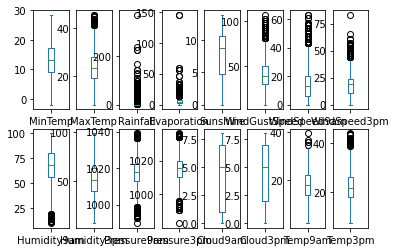

In [22]:
df.plot(kind='box',subplots=True,layout=(2,8))

<AxesSubplot:>

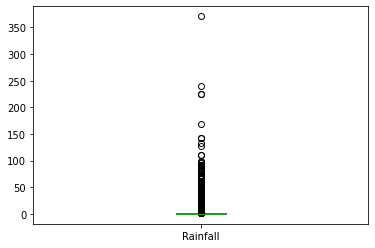

In [23]:
df['Rainfall'].plot.box()

<AxesSubplot:ylabel='Frequency'>

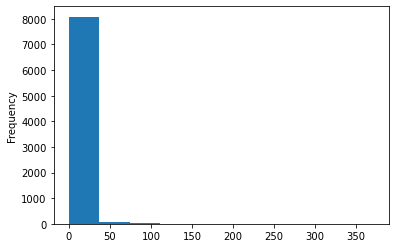

In [33]:
df['Rainfall'].plot.hist()

In [3]:
df.info

<bound method DataFrame.info of             Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1     2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2     2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3     2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4     2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
...          ...      ...      ...      ...       ...          ...       ...   
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     Wi

In [6]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.720955,0.091642,0.348643,0.081365,0.241317,0.137263,0.180091,-0.130906,0.079569,-0.465478,-0.458665,0.111213,0.046889,0.888342,0.689652
MaxTemp,0.720955,1.000000,-0.088906,0.424728,0.523909,0.146113,0.013425,0.088797,-0.392496,-0.424217,-0.347285,-0.430074,-0.307700,-0.301675,0.869503,0.978665
Rainfall,0.091642,-0.088906,1.000000,0.043463,-0.209654,0.104999,0.051349,0.025185,0.231702,0.238730,-0.080412,-0.037270,0.195157,0.159250,-0.007191,-0.092263
Evaporation,0.348643,0.424728,0.043463,1.000000,0.340893,0.214069,0.176701,0.142421,-0.286869,-0.221244,-0.218171,-0.233401,-0.084288,-0.152637,0.405467,0.414156
Sunshine,0.081365,0.523909,-0.209654,0.340893,1.000000,-0.018455,-0.025112,0.045031,-0.512349,-0.630536,0.028666,-0.047098,-0.705577,-0.723957,0.348708,0.546057
WindGustSpeed,0.241317,0.146113,0.104999,0.214069,-0.018455,1.000000,0.656079,0.711403,-0.286045,-0.097380,-0.430736,-0.394745,0.030124,0.104157,0.211477,0.106872
WindSpeed9am,0.137263,0.013425,0.051349,0.176701,-0.025112,0.656079,1.000000,0.566322,-0.358981,-0.111595,-0.197189,-0.156517,-0.000607,0.068930,0.109936,-0.002619
WindSpeed3pm,0.180091,0.088797,0.025185,0.142421,0.045031,0.711403,0.566322,1.000000,-0.252488,-0.091248,-0.291271,-0.240378,0.005807,0.003894,0.185329,0.066201
Humidity9am,-0.130906,-0.392496,0.231702,-0.286869,-0.512349,-0.286045,-0.358981,-0.252488,1.000000,0.636255,0.154699,0.188463,0.472126,0.352736,-0.378389,-0.383788
Humidity3pm,0.079569,-0.424217,0.238730,-0.221244,-0.630536,-0.097380,-0.111595,-0.091248,0.636255,1.000000,0.001763,0.076002,0.509797,0.520221,-0.130973,-0.491634


<AxesSubplot:>

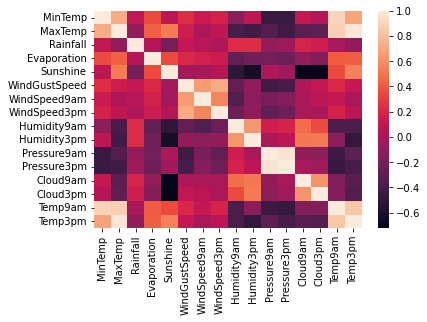

In [7]:
sns.heatmap(df.corr())

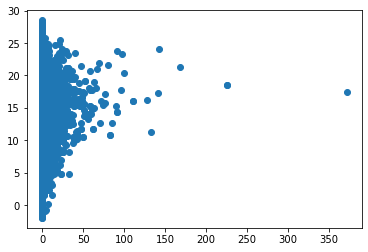

In [9]:
plt.scatter(df['Rainfall'],df['MinTemp'])
plt.show()

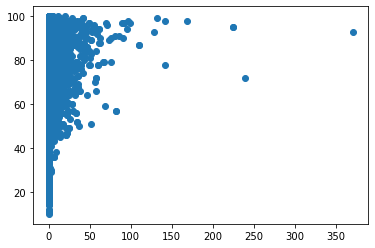

In [11]:
plt.scatter(df['Rainfall'],df['Humidity9am'])
plt.show()

We can observe that with increase in Humidity9am chances of rainfall inrcease

In [ ]:
Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'

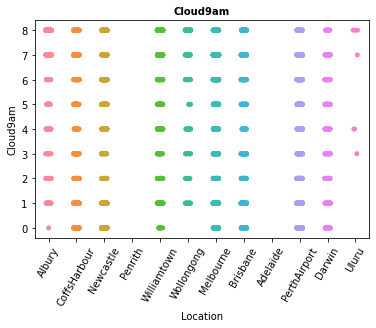

In [23]:
plt.xticks(rotation=60,fontsize=10)
sns.stripplot(x="Location",y="Cloud9am",data=df)
plt.title('Cloud9am',fontsize=10,fontweight="bold")
plt.show()

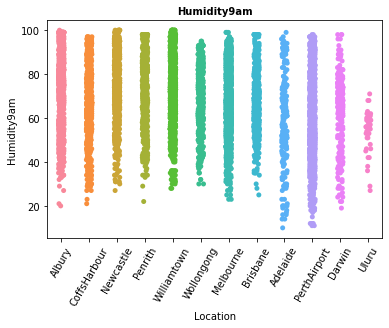

In [24]:
plt.xticks(rotation=60,fontsize=10)
sns.stripplot(x="Location",y="Humidity9am",data=df)
plt.title('Humidity9am',fontsize=10,fontweight="bold")
plt.show()

Text(0.5, 1.0, 'Chances of Rain Today')

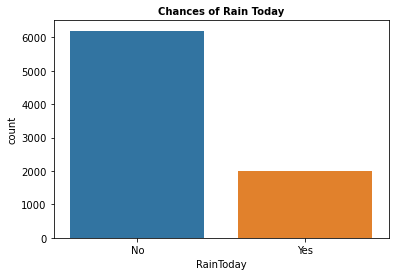

In [12]:
sns.countplot(x='RainToday',data=df)
plt.title('Chances of Rain Today',fontsize=10,fontweight="bold")

We can predicte that by observing above model it will not rain Today.

Text(0.5, 1.0, 'Chances of Rain Tomorrow')

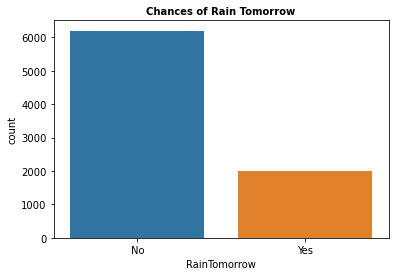

In [13]:
sns.countplot(x='RainTomorrow',data=df)
plt.title('Chances of Rain Tomorrow',fontsize=10,fontweight="bold")

In [ ]:
We can predicte that by observing above model it will not rain tomorrow.